# MSA 2024 Phase 2 - Part 1

In [45]:
import sklearn
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import openpyxl
%matplotlib inline

## 1. Find all variables and understand them

### 1 get file path and initial load the data

In [46]:
#get path and print the head of data
PATH_ROOT = Path(os.getcwd()).parent
PATH_X = PATH_ROOT /'0. Resources'/ 'datasets' / 'X store sales' / 'store_sales.csv'

print(f"Path: {PATH_X}")

df1 = pd.read_csv(PATH_X, encoding='latin1')
df1.head()


Path: /Users/vitaliigalkin/2024-Phase-2/data-science/0. Resources/datasets/X store sales/store_sales.csv


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


### 2 get the datatype and basic understanding of the data

- From the basic data information, we know that there are 21 features in the dataset. In those features, Row ID, Postal Code, Sales, Quantity, Discount and Profit are numeric features. Others are object. However, the datatype still need to be restricted, for example, the Odedate should be datetype,  and costumer Id can be numeric. 

- we also have 2121 instances in the dataset, and it looks like there is no none value. But we still need to dig bit more about the va;ues to confirm if any value is missing.

In [47]:
print(f"Basic data info(datatype, Non-null colums number):")
df1.info()

Basic data info(datatype, Non-null colums number):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  S

### 3 Visualize numerical columns(Basic)

In [48]:
print(f"numeric variable data statistic information: "  )
df1.describe()

numeric variable data statistic information: 


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


Visualize numerical columns

In [49]:
def visuaNum(col,bin,df):
  fig,axis = plt.subplots(1,2, figsize = (15,8))
  plt.figure(figsize=(12, 6))
  sns.histplot(df[col], bins=bin, kde=True, ax=axis[0])
  axis[0].set_title(f'Distribution of {col}')
  axis[0].set_xlabel(f'{col}')
  axis[0].set_ylabel('Frequency')
  sns.boxplot(df[col], color="lightgreen",ax=axis[1])
  plt.show()

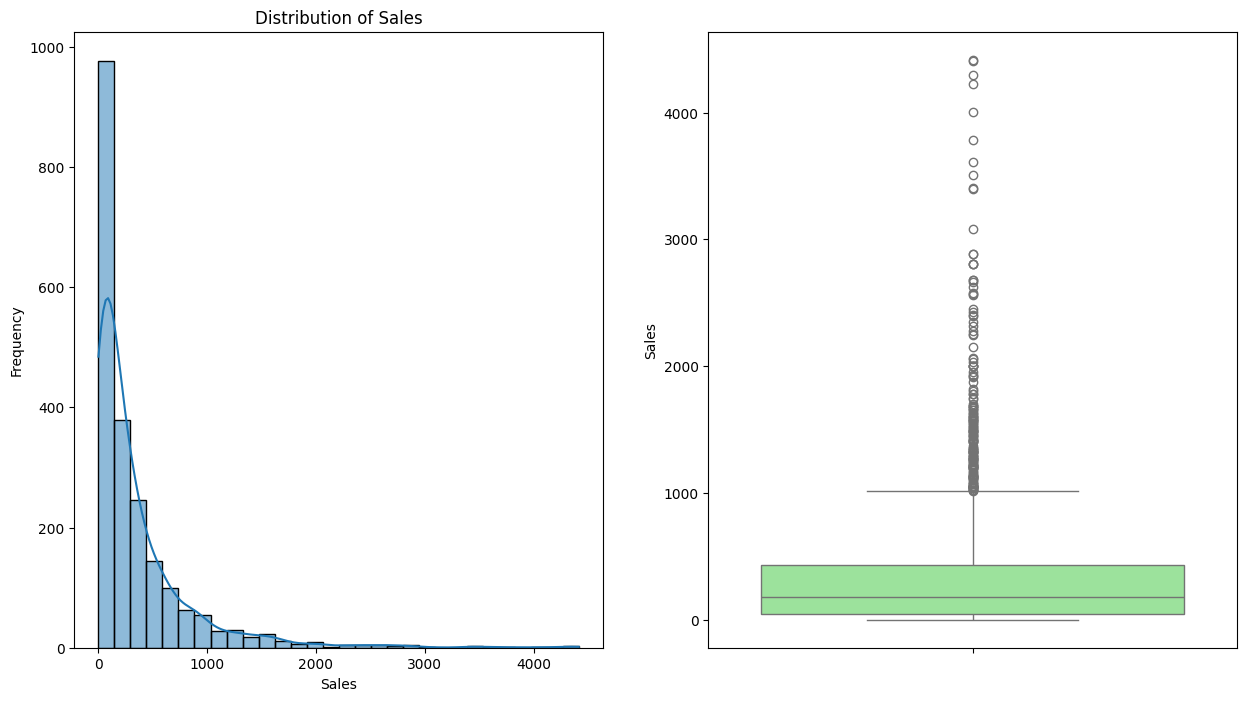

<Figure size 1200x600 with 0 Axes>

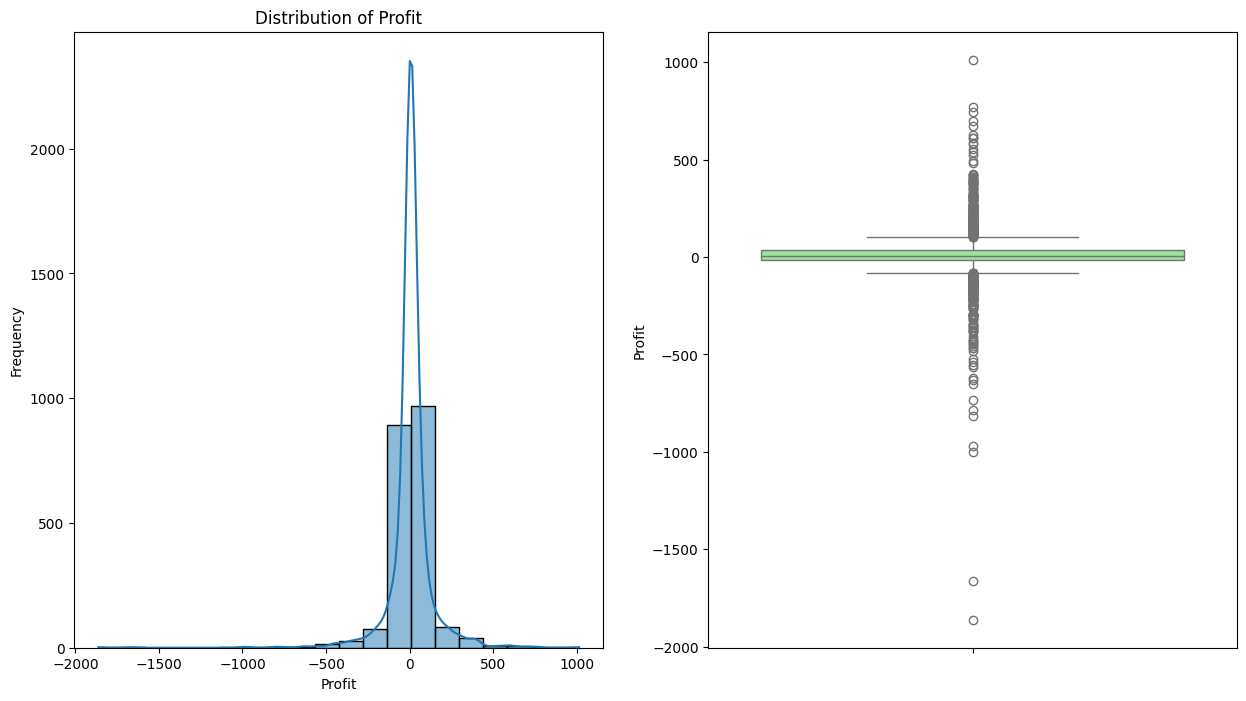

<Figure size 1200x600 with 0 Axes>

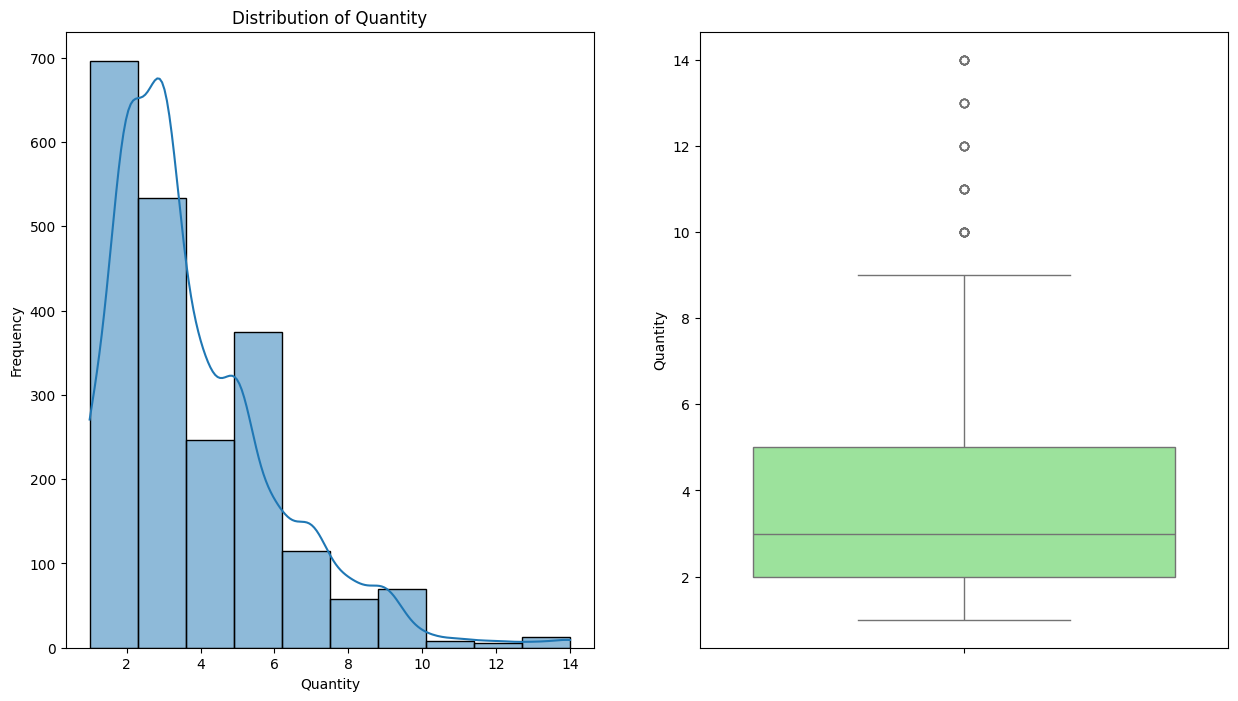

<Figure size 1200x600 with 0 Axes>

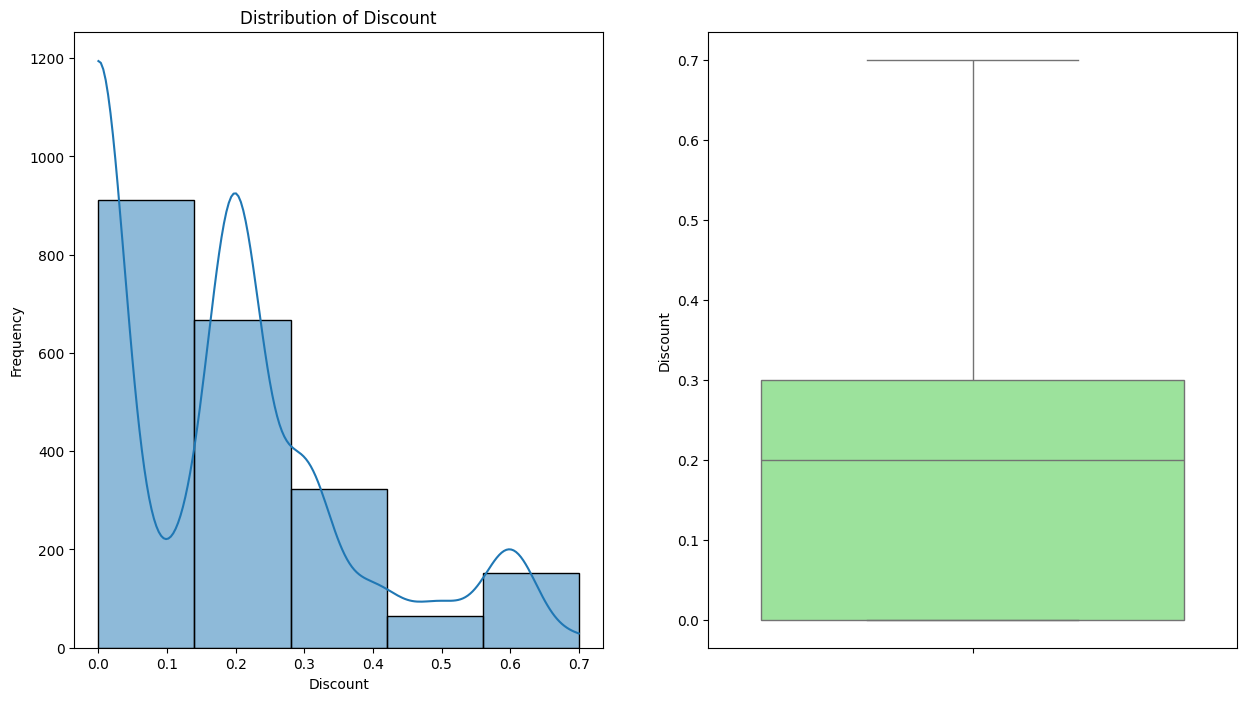

<Figure size 1200x600 with 0 Axes>

In [50]:
visuaNum("Sales",30,df1)
visuaNum("Profit",20,df1)
visuaNum("Quantity",10,df1)
visuaNum("Discount",5,df1)

## 2. Visualize data

### 1. visualiza sales and profit data by time- serials such as weekly, monthly, quater and yearly.


#### visualise the sales and profit by weekly, months, quately and yearly

In [51]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])

df = df1.copy()
# Set 'Order Date' as index
df.set_index('Order Date', inplace=True)

In [52]:
# Filter numeric columns
numeric_df = df[['Sales', 'Profit']]

# Weekly Data
weekly_data = numeric_df.resample('W').sum()

# Monthly Data
monthly_data = numeric_df.resample('M').sum()

# Quarterly Data
quarterly_data = numeric_df.resample('Q').sum()

# Yearly Data
yearly_data = numeric_df.resample('Y').sum()



/var/folders/qy/lc7gm1sj4tx63q6y7hvjpf7c0000gn/T/ipykernel_94102/1312853695.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = numeric_df.resample('M').sum()
/var/folders/qy/lc7gm1sj4tx63q6y7hvjpf7c0000gn/T/ipykernel_94102/1312853695.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = numeric_df.resample('Q').sum()
/var/folders/qy/lc7gm1sj4tx63q6y7hvjpf7c0000gn/T/ipykernel_94102/1312853695.py:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = numeric_df.resample('Y').sum()


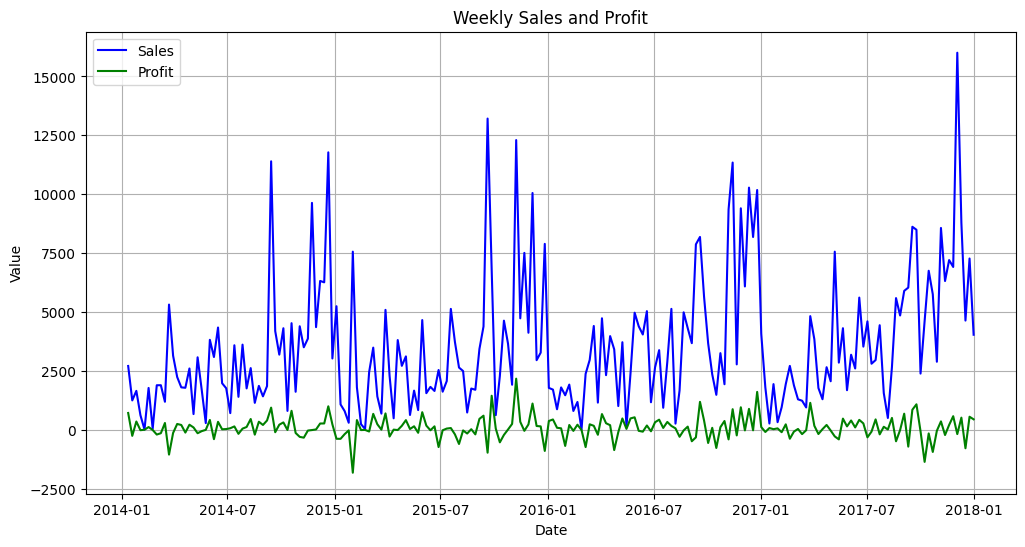

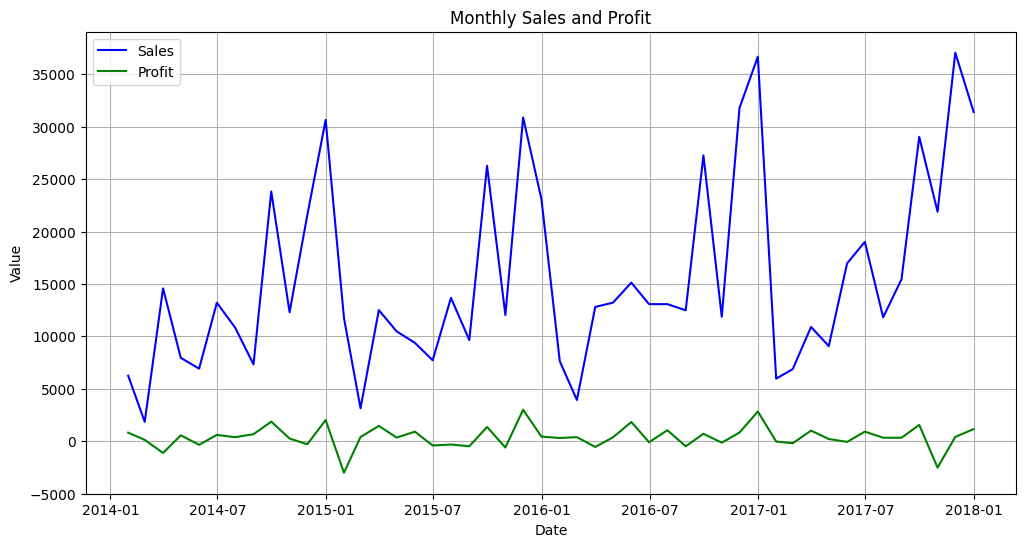

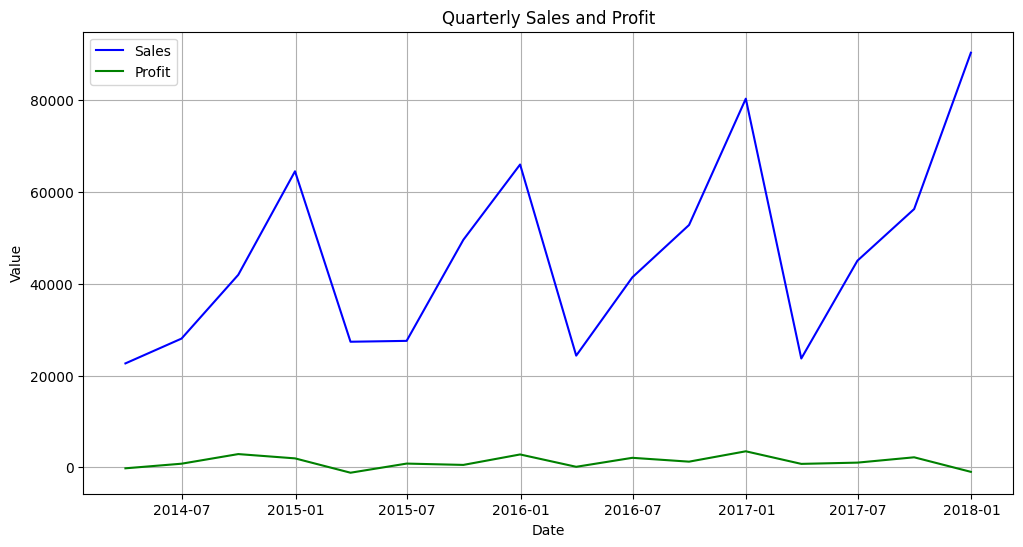

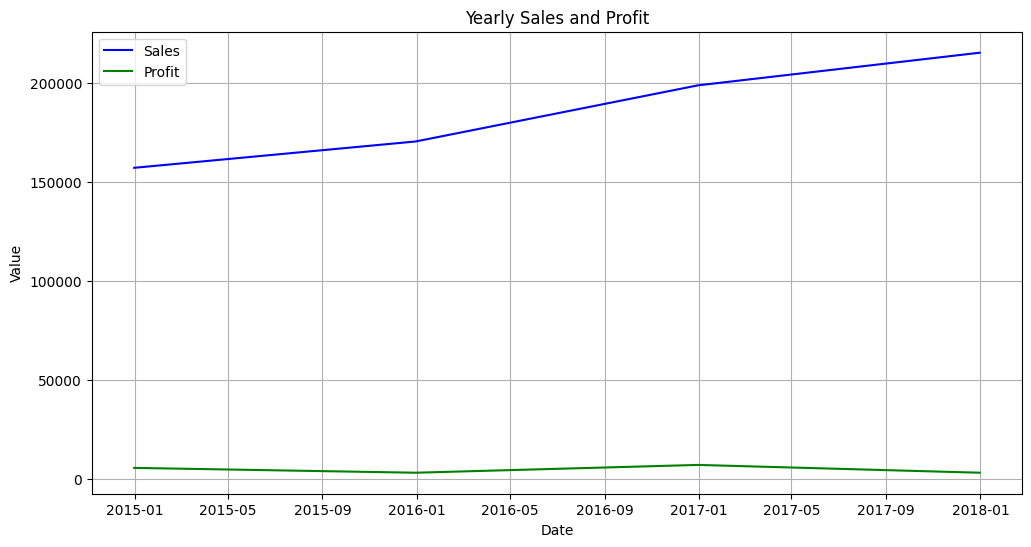

In [53]:
def plot_time_series(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Sales'], label='Sales', color='blue')
    plt.plot(data.index, data['Profit'], label='Profit', color='green')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Weekly Data
plot_time_series(weekly_data, 'Weekly Sales and Profit')
# Plot Monthly Data
plot_time_series(monthly_data, 'Monthly Sales and Profit')
# Plot Quarterly Data
plot_time_series(quarterly_data, 'Quarterly Sales and Profit')
# Plot Yearly Data
plot_time_series(yearly_data, 'Yearly Sales and Profit')

##### Summary and Analysis of Sales and Profit Trends

#### Sales Trends
- **Overall Trend:** Sales are showing a consistent upward trajectory on a yearly basis.
- **Short-Term Variations:** Despite the overall growth, sales figures exhibit fluctuations when analyzed weekly, monthly, and quarterly. These short-term variations create a wavy pattern in the data, but the long-term trend remains positive.

#### Profit Trends
- **Overall Trend:** The business is generating profits, indicating successful earnings.
- **Long-Term Observation:** There is a slight downward trend in profit over the long term, even though the business remains profitable.
- **Short-Term Variations:** Profit figures also display variability on a weekly, monthly, and quarterly basis. These fluctuations contribute to a wavy pattern, with a general slight decline in trend.

### 2. visualiza sales in different categrory data by time- serials such as weekly, monthly, quater and yearly.

In [54]:
df1['Year-Month'] = df1['Order Date'].dt.to_period('M')
df1['Year-Week'] = df1['Order Date'].dt.to_period('W')
df1['Year'] = df1['Order Date'].dt.to_period('Y')

# Extract the week from 'Order Date' and create a new column for it
df1['Week'] = df1['Year-Week'].astype(str)
df1['Week_Part'] = df1['Week'].apply(lambda x: x.split("/")[0])

In [55]:
# transfer string to date
df1['Week_Part'] = pd.to_datetime(df1['Week_Part'], format='%Y-%m-%d')
#transfer period data to date
df1['Year-Month'] = df1['Year-Month'].dt.to_timestamp()
df1['Year'] = df1['Year'].dt.to_timestamp()

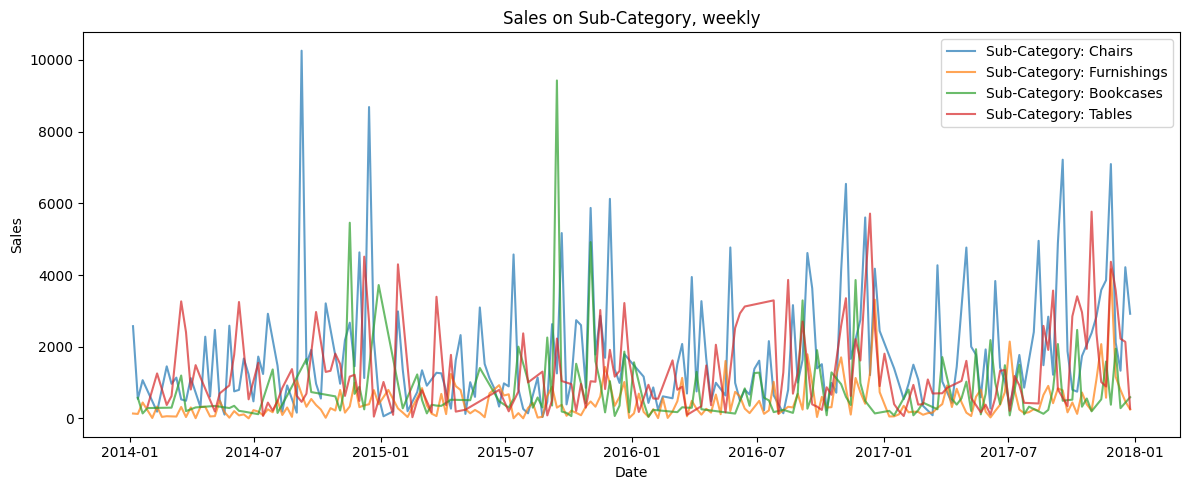

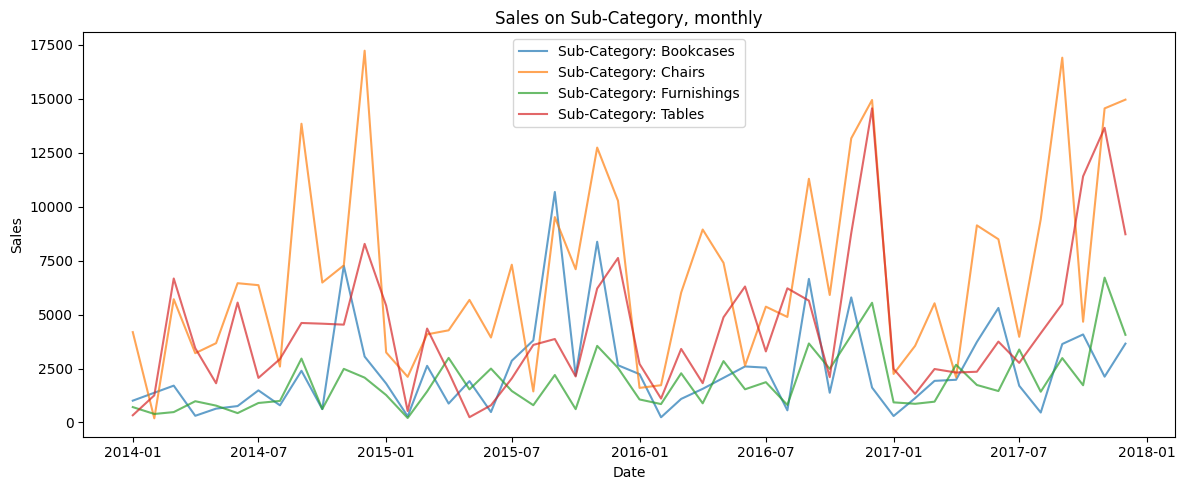

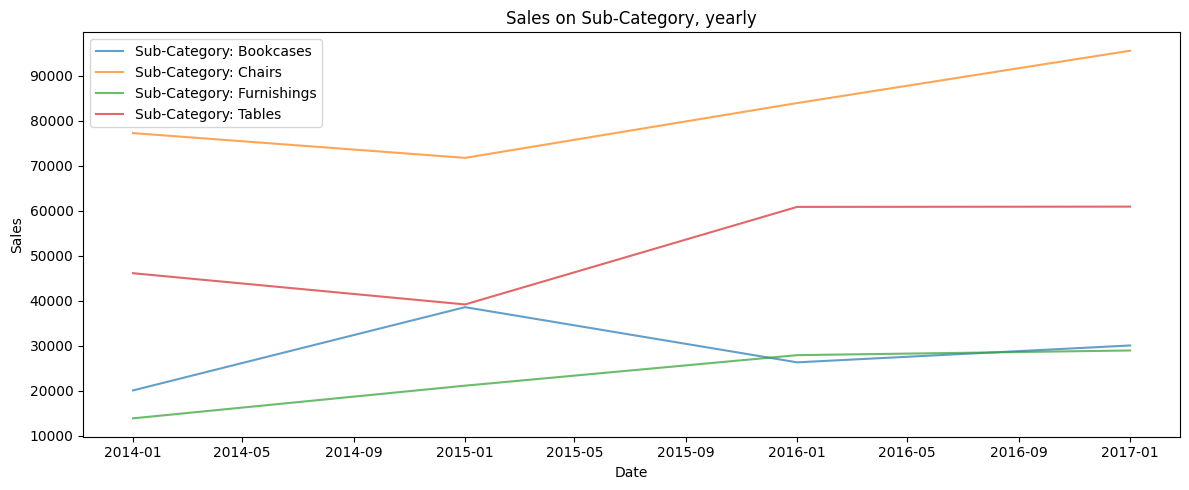

In [56]:
def plot_category_sales(input_date, text, cat):
    agg_sales = df1.groupby([input_date, cat]).agg({"Sales": "sum"}).reset_index()
    
    plt.figure(figsize=(12, 5))

    for i in agg_sales[cat].unique():
        category = agg_sales[cat]
        a = agg_sales.loc[category == i, input_date]
        plt.plot(a,agg_sales.loc[agg_sales[cat] == i, "Sales"], label=f"{cat}: {i}", alpha=0.7)
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.title(f"Sales on {cat}, {text}")
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_category_sales('Week_Part','weekly','Sub-Category')
plot_category_sales('Year-Month','monthly','Sub-Category')
plot_category_sales('Year','yearly','Sub-Category')

#### Summary and Analysis of sales trends over time for different sub-categories: Bookcases, Chairs, Furnishings, and Tables.

- **Yearly Sales Trends:** 
Chairs (orange line) have consistently high sales, increasing from around 80,000 to nearly 100,000 by the end of the period.
Tables (red line) started with lower sales, crossed paths with Bookcases around 2015, and then slightly declined.
Bookcases (blue line) showed a significant rise in sales, surpassing Tables and ending slightly below Chairs.
Furnishings (green line) have the lowest sales but show a steady increase over time.

- **Monthly Sales Trends:** 
The graph shows more volatility in monthly sales, with notable peaks and troughs.
Chairs and Tables exhibit the highest peaks, indicating occasional high sales months.
Furnishings consistently have the lowest monthly sales, with minor fluctuations.

- **Weekly Sales Trends:** 
The weekly sales data displays even more variability, with frequent spikes.
Chairs (blue line) and Bookcases (green line) show the highest peaks, suggesting occasional promotions or high-demand periods.
Furnishings and Tables have lower peaks and more stable, less frequent spikes.
Overall, Chairs dominate in sales, followed by Tables and Bookcases, with Furnishings lagging behind. The data shows a general upward trend in sales for most categories, with seasonal or promotional spikes affecting weekly and monthly data.

### 3. visualiza sales in different segment data by time- serials such as weekly, monthly, quater and yearly.

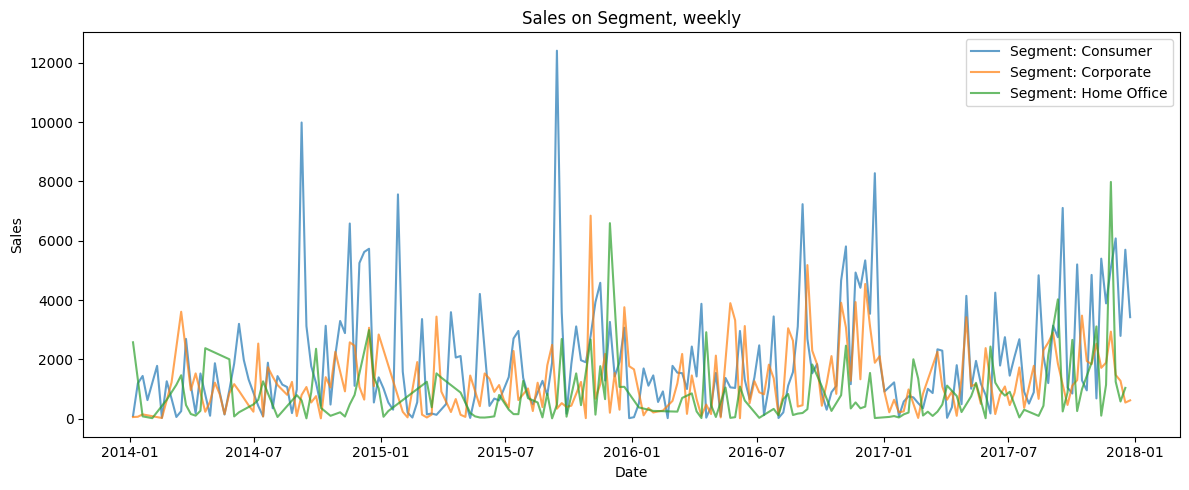

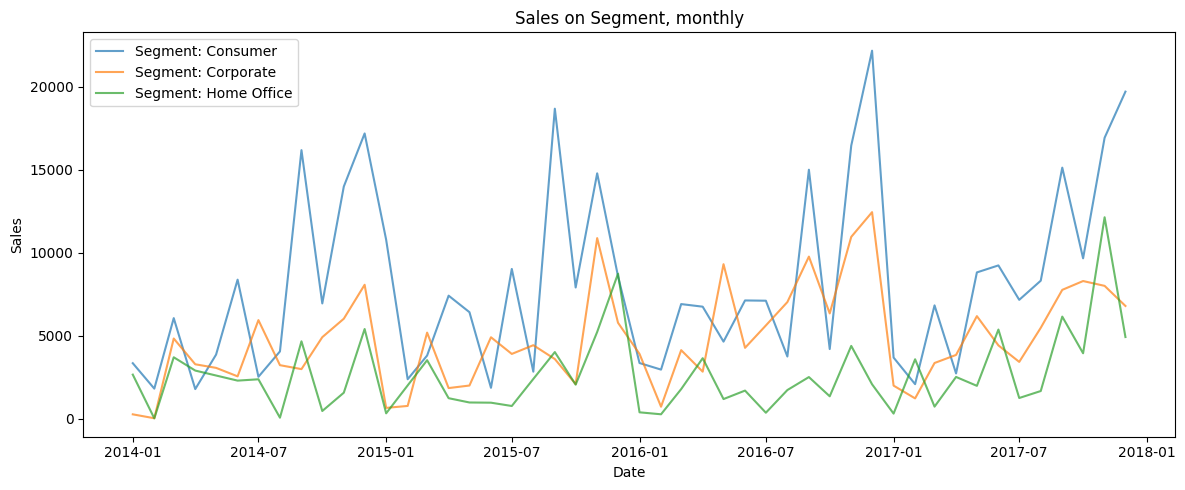

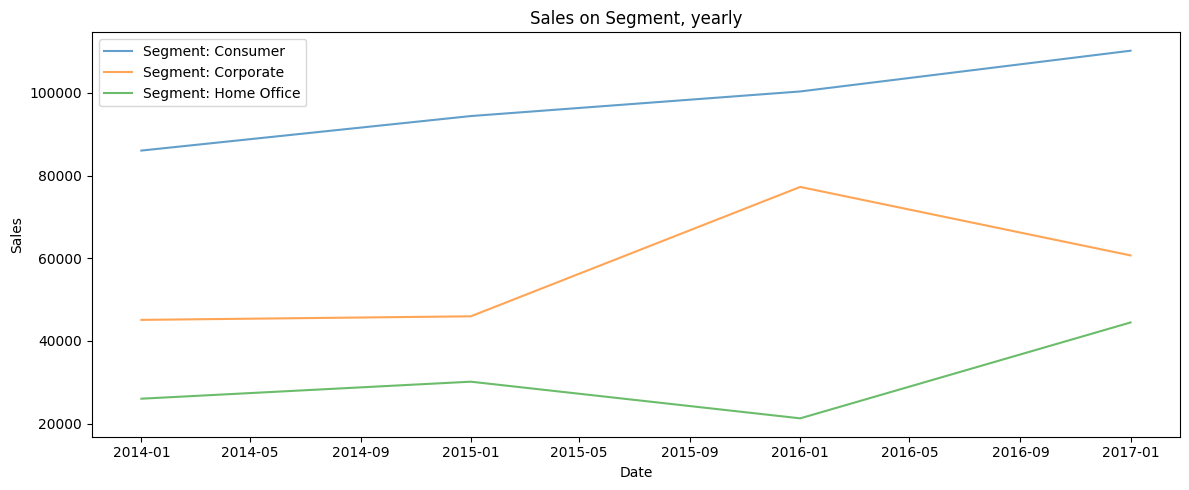

In [57]:
plot_category_sales('Week_Part','weekly','Segment')
plot_category_sales('Year-Month','monthly','Segment')
plot_category_sales('Year','yearly','Segment')

#### Summary and Analysis of sales trends over time for different segments: consumer, corporate and home office

- **Yearly Sales Trends:** 
Consumer(blue line) have consistently high sales, increasing from 8000 to more than 100000 from year 2014 to 2017.
Corporate (yellow line) was stable and slightly increased from more than 4000 to more than 8000 but also slightly dropped down in the end of the period.
Home Office (blue line) showed slimilar trend as coporate in the biggining stage and then droped down bit but in the end , it slightly went up.

- **Monthly Sales Trends:** 
The graph shows more volatility in monthly sales, with notable peaks and troughs.
Consumer exhibit the highest peaks, indicating occasional high sales months.

- **Weekly Sales Trends:** 
Weekly sales show even greater variability, with frequent spikes and drops.
Consumer segment demonstrates the most pronounced peaks, suggesting the presence of periodic promotions or other factors that temporarily boost sales. This indicates a highly responsive market in this segment, where sales can surge significantly during specific times.

Overall, the Consumer segment leads in terms of sales volume and growth, with noticeable peaks during certain periods. The Corporate and Home Office segments, while showing stability, do not exhibit the same level of growth or peak sales activity, indicating different market dynamics or customer behaviors.

In [58]:
def sale_profit_bar(col):
  plt.figure(figsize=(12, 6))
  sales_by_category = df1.groupby(col)['Sales'].sum().reset_index()
  profit_by_category = df1.groupby(col)['Profit'].sum().reset_index()

  plt.subplot(121)
  sns.barplot(x=col, y='Sales', data=sales_by_category)
  plt.title(f'Total Sales by {col}')
  plt.xlabel(f'{col}')
  plt.ylabel('Total Sales')
  plt.xticks(rotation=45)

  plt.subplot(122)
  sns.barplot(x=col, y='Profit', data=profit_by_category)
  plt.title(f'Total Profit by {col}')
  plt.xlabel(f'{col}')
  plt.ylabel('Total Profit')
  plt.xticks(rotation=45)
  plt.show()

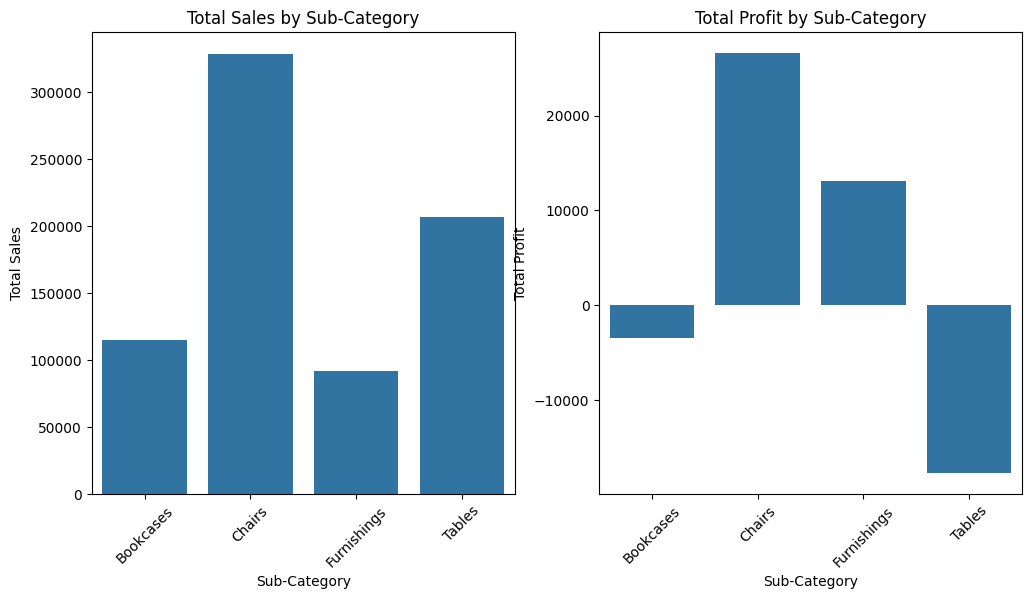

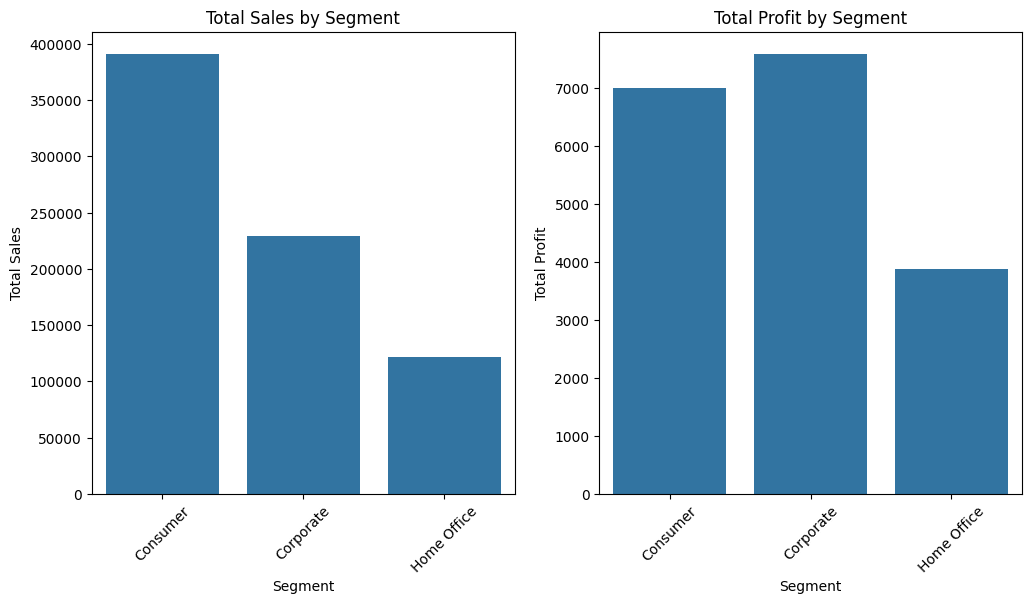

In [59]:
sale_profit_bar('Sub-Category')
sale_profit_bar('Segment')

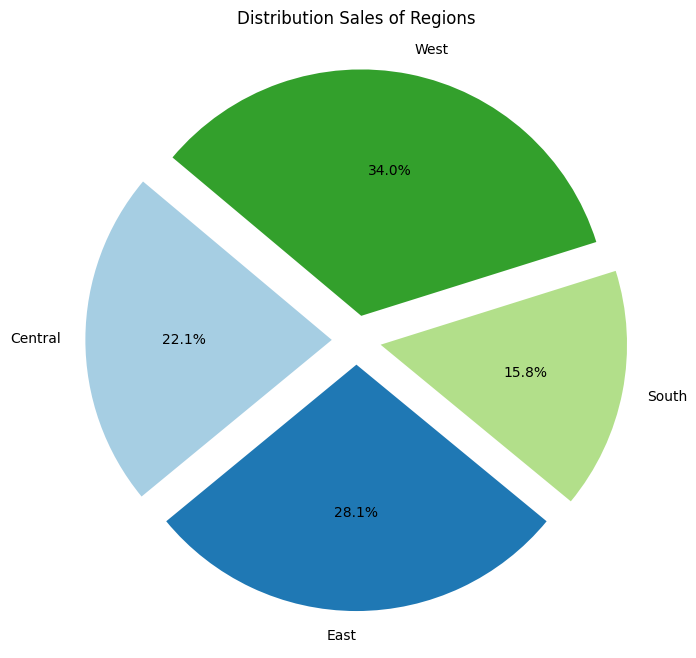

In [60]:
region_counts = df1.groupby("Region")['Sales'].sum()
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(region_counts, 
        labels=region_counts.index, 
        autopct='%1.1f%%',       # Show percentages
        startangle=140,         # Start angle for the pie chart
        colors=plt.cm.Paired(range(len(region_counts))),  # Use a colormap for colors
        explode=[0.1] * len(region_counts)  # Optionally explode all slices for visibility
       )
plt.title('Distribution Sales of Regions')
plt.show()

## 3. Clean data

### 1 checking missing data

In [61]:
print(f'\033[94mNumber of rows dataset: {df1.shape[0]}')
print(f'\033[94mNumber of columns dataset: {df1.shape[1]}')
print(f'\033[94mNumber of values dataset: {df1.count().sum()}')
print(f'\033[94mNumber missing data: {sum(df1.isna().sum())}')

Number of rows dataset: 2121
Number of columns dataset: 26
Number of values dataset: 55146
Number missing data: 0


### 2 correct datatype

In [62]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

### 3  Outliners detection

1. Outlier Detection Using Z-Scores

For detecting outliers, I utilized the Z-score method, which standardizes data points by measuring how many standard deviations each value is from the mean. In this analysis, I set the threshold for identifying outliers at 5. This means that any data point with a Z-score greater than 5 is considered an outlier.

2. Impact of Outlier Removal

To evaluate the impact of outlier removal, I compared graphical representations of the data before and after removing outliers. The comparison showed that the changes were acceptable and did not significantly alter the overall relationships and trends in the yearly sales and profit data. The core trends and patterns remained intact, ensuring that the primary insights from the data were preserved.

3. Future Considerations for Model Building

The preliminary analysis suggests that removing outliers may not significantly influence the data's core trends. However, further impact will be assessed during the model-building phase. If it is found that the presence of outliers could enhance model performance or lead to more accurate predictions, I am prepared to reintroduce the outliers into the dataset. This iterative approach ensures that the final model benefits from the most relevant and accurate data.

4. Justification for Threshold Choice

I selected a Z-score threshold of 5 instead of 3 to balance between detecting outliers and preserving the integrity of the data. A threshold of 3 results in a higher number of detected outliers due to the increased number of Z-scores exceeding 3. Removing a larger number of outliers can severely impact the data's performance and potentially distort the analysis. By setting the threshold at 5, I aimed to minimize the risk of disproportionately affecting the dataset while still addressing extreme values that could skew the results. Also the dataset is small so it will impact the dataset if lots of outliers are removed.

In [63]:
# Z-Score method
from scipy.stats import zscore

# Calculate the Z-scores for the 'Sales' and 'Profit' columns
z_scores = zscore(df1[['Sales', 'Profit']])
threshold = 5

# Identify the rows that contain any Z-score above the threshold
outliers = (z_scores > threshold).any(axis=1)

# Extract the rows containing outliers
outliers_df = df1[outliers]

outliers_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Year-Month,Year-Week,Year,Week,Week_Part
7,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522,2015-09-01,2015-09-14/2015-09-20,2015-01-01,2015-09-14/2015-09-20,2015-09-14
259,1247,CA-2014-168494,2014-12-12,2014-12-14,Second Class,NP-18700,Nora Preis,Consumer,United States,Fresno,...,Bretford Rectangular Conference Table Tops,3610.848,12,0.2,135.4068,2014-12-01,2014-12-08/2014-12-14,2014-01-01,2014-12-08/2014-12-14,2014-12-08
1070,5171,CA-2016-122903,2016-05-27,2016-05-29,Second Class,LA-16780,Laura Armstrong,Corporate,United States,Detroit,...,HON 5400 Series Task Chairs for Big and Tall,3504.900,5,0.0,700.9800,2016-05-01,2016-05-23/2016-05-29,2016-01-01,2016-05-23/2016-05-29,2016-05-23
1232,5918,US-2015-126977,2015-09-17,2015-09-23,Standard Class,PF-19120,Peter Fuller,Consumer,United States,New York City,...,"Riverside Palais Royal Lawyers Bookcase, Royal...",4228.704,6,0.2,158.5764,2015-09-01,2015-09-14/2015-09-20,2015-01-01,2015-09-14/2015-09-20,2015-09-14
1276,6100,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,Hon 4070 Series Pagoda Armless Upholstered Sta...,2888.127,11,0.1,609.7157,2017-09-01,2017-09-18/2017-09-24,2017-01-01,2017-09-18/2017-09-24,2017-09-18


In [64]:
# transfrom ouliners
df_cleaned = df1[~outliers]

- get the all the oulines and compare removed and not removed in the graph

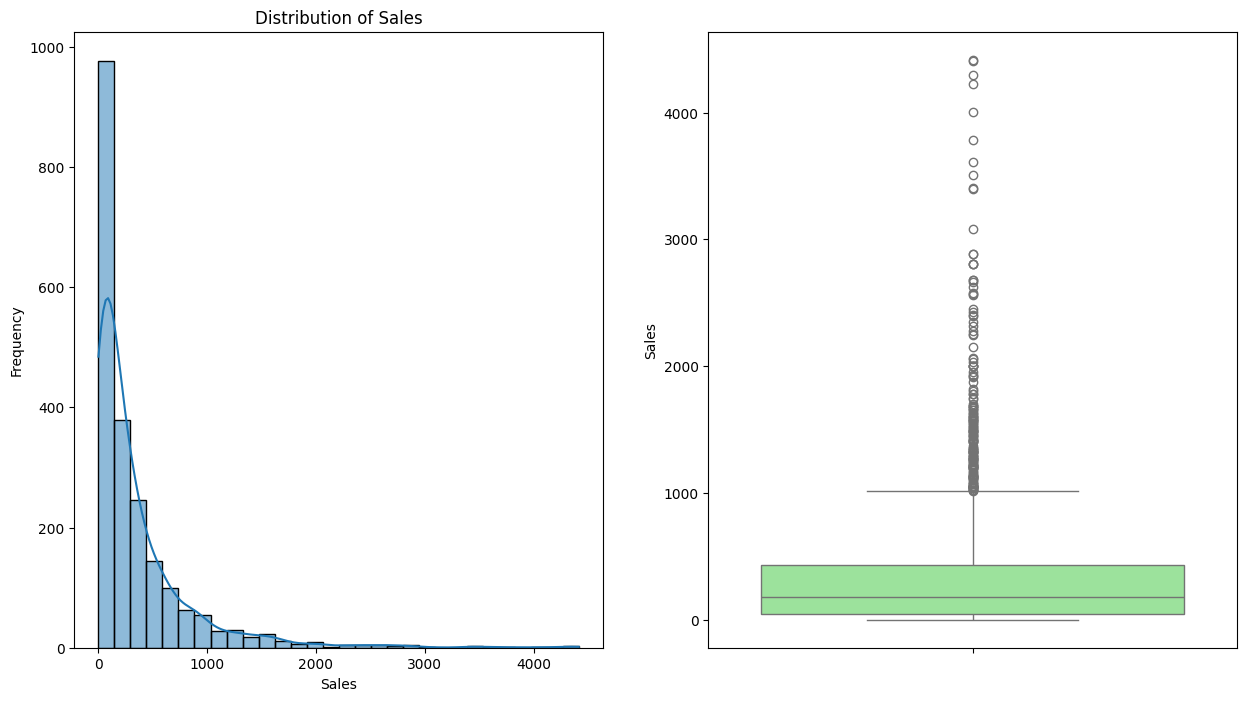

<Figure size 1200x600 with 0 Axes>

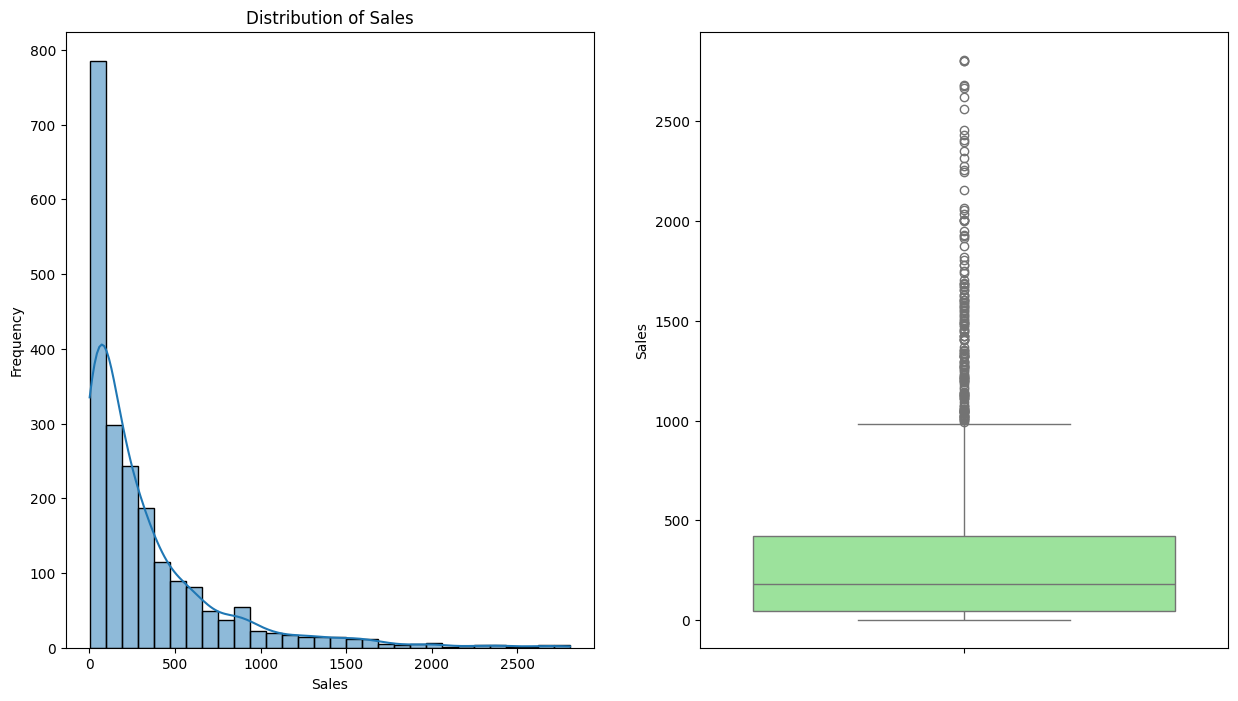

<Figure size 1200x600 with 0 Axes>

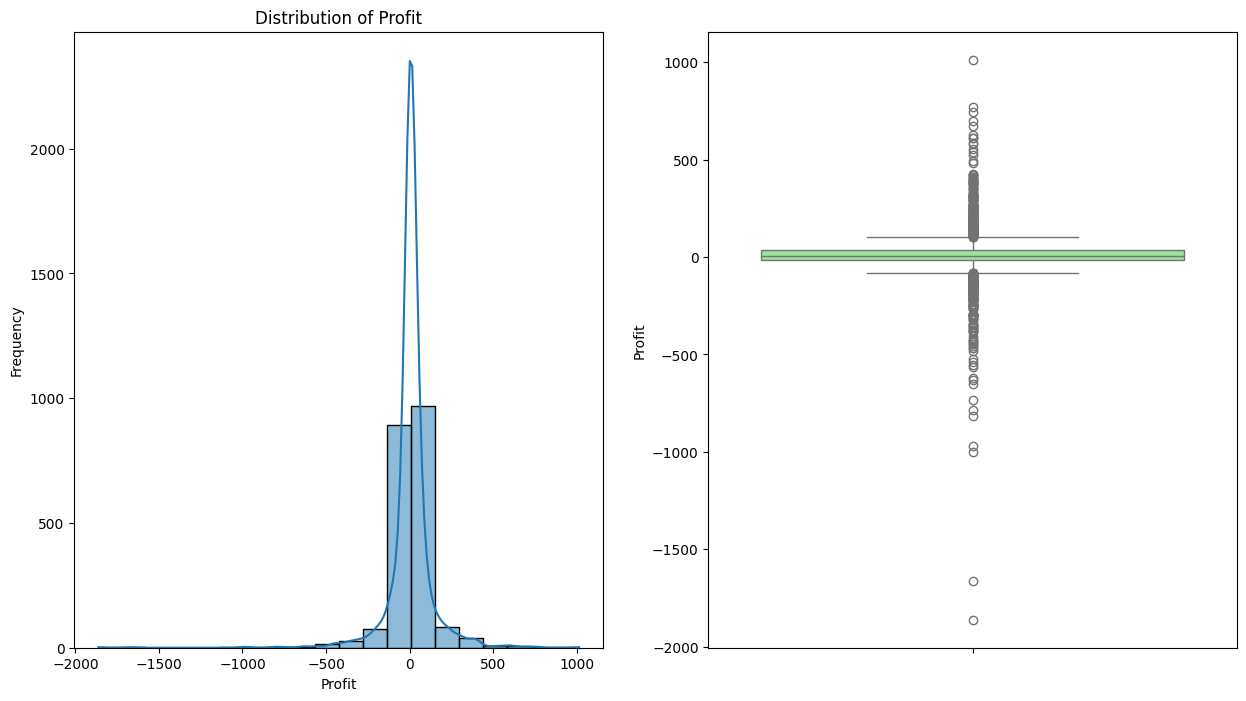

<Figure size 1200x600 with 0 Axes>

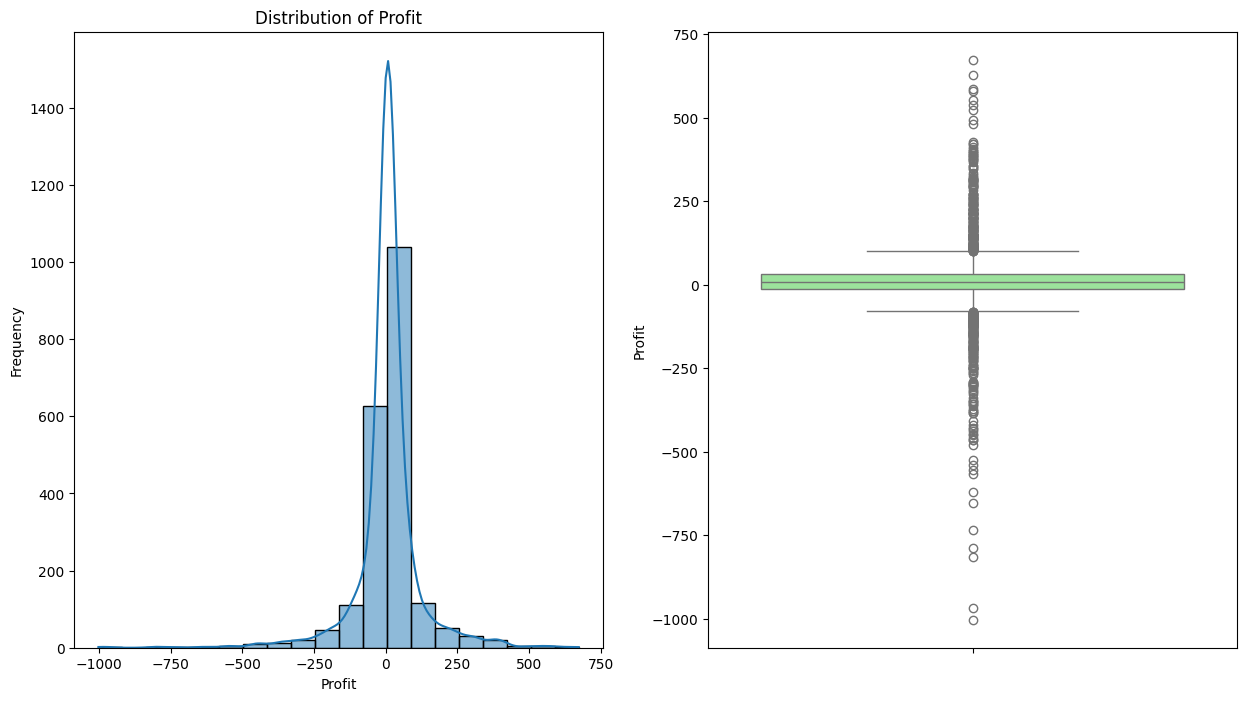

<Figure size 1200x600 with 0 Axes>

In [65]:
visuaNum("Sales",30,df1)
visuaNum("Sales",30,df_cleaned)
visuaNum("Profit",20,df1)
visuaNum("Profit",20,df_cleaned)

* from comparing two graph, we can know that removing the ouliners doesnt impact the distribution of the original features much, especially for the mean and median, so I decide to remove the outliners. 
**But I might do Multiple iterations must take place. Repeat various steps(such as adding back the ouliners) to ensure my model is effective/robust.**

### 4 Feature selection

### 1 Removing Redundant Features

### Feature Selection for Sales Forecasting

#### Features to Keep:

- **Order Date**: Crucial for time-series analysis and forecasting, as it provides the temporal context for sales data.
- **Sales**: The primary variable you're forecasting.
- **Quantity**: Helps in understanding volume trends, which may be correlated with sales.
- **Discount**: Useful for analyzing the impact of discounts on sales volumes.
- **Segment**: Provides insight into different customer segments, which may have distinct purchasing patterns.
- **Category & Sub-Category**: Important for understanding trends in specific product types.
- **Ship Mode**: Could influence customer satisfaction and repeat purchases, indirectly affecting sales.
- **Region (or State/City)**: Geographic factors can influence sales due to regional preferences, economic conditions, or promotional targeting. We just need to keep one here.

#### Features to Remove:

- **Row ID**: This is a unique identifier and does not provide analytical value for forecasting.
- **Order ID**: Similar to Row ID, it's not typically useful for aggregate sales forecasting.
- **Customer ID & Customer Name**: Unless forecasting at the individual customer level, these features can be removed to maintain customer privacy and simplify the dataset.
- **Postal Code**: If geographical granularity is not required beyond region or state.
- **Product ID & Product Name**: These can be redundant if Category and Sub-Category are used. Keep only if specific product-level forecasting is needed.
- **Ship Date**: Unless the analysis involves logistics or delivery time considerations, this feature might not be necessary.
- **Year-Month, Year-Week, Year, Week, Week_Part**: These need to be removed, as they were created for visualization purposes.

#### Geographical Features

Since Region, State, and City are redundant, keeping only the 'Region' feature is recommended for a broader geographical analysis without over-complicating the model.


In [66]:
df = df_cleaned.drop(columns=['Row ID', 'Order ID', 'Customer ID','Customer Name','Product ID','Product Name','Country','Category','Ship Date','Year-Month', 'Year-Week', 'Year', 'Week', 'Week_Part','City','State','Postal Code'])

# Also remove country and category because they only have 1 value
print(df_cleaned["Category"].unique())
print(df_cleaned["Country"].unique())


['Furniture']
['United States']


In [67]:
df.head()

,Order Date,Ship Mode,Segment,Region,Sub-Category,Sales,Quantity,Discount,Profit
0,2016-11-08,Second Class,Consumer,South,Bookcases,261.9600,2,0.00,41.9136
1,2016-11-08,Second Class,Consumer,South,Chairs,731.9400,3,0.00,219.5820
2,2015-10-11,Standard Class,Consumer,South,Tables,957.5775,5,0.45,-383.0310
3,2014-06-09,Standard Class,Consumer,West,Furnishings,48.8600,7,0.00,14.1694
4,2014-06-09,Standard Class,Consumer,West,Tables,1706.1840,9,0.20,85.3092


### 2 Encode the category features

In [68]:
from sklearn.preprocessing import OneHotEncoder

# List of categorical features to encode
categorical_features = ['Ship Mode', 'Segment',  'Region',  'Sub-Category']

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first').set_output(transform="pandas")  # drop='first' to avoid multicollinearity

# Fit and transform the data
encoded_features = one_hot_encoder.fit_transform(df[categorical_features])

encoded_features.head()

,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Region_East,Region_South,Region_West,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [69]:
df_cleaned = pd.concat([df, encoded_features], axis=1).drop(columns = ['Ship Mode','Segment',  'Region',  'Sub-Category'])
df_cleaned.head()

,Order Date,Sales,Quantity,Discount,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Region_East,Region_South,Region_West,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
0,2016-11-08,261.9600,2,0.00,41.9136,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2016-11-08,731.9400,3,0.00,219.5820,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2015-10-11,957.5775,5,0.45,-383.0310,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2014-06-09,48.8600,7,0.00,14.1694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2014-06-09,1706.1840,9,0.20,85.3092,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [70]:
PATH_X_clean = PATH_ROOT /'0. Resources'/ 'datasets' / 'X store sales' / 'sales_clean.csv'
df_cleaned.to_csv(PATH_X_clean)

## 4. Identify correlated variables

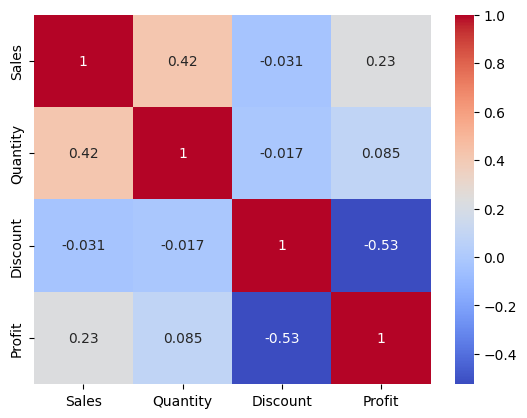

In [71]:
## Calculate the correlation matrix
corr = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Heatmap shows: 
#### Strong Positive Correlation
**Sales and Quantity**: The strong positive correlation (0.42) indicates that Quantity is an important predictor of Sales. Therefore, both features should be kept for forecasting purposes.

#### Weak Negative Correlation
**Discount and Profit**: The negative correlation (-0.53) suggests that higher discounts are associated with lower profits. This indicates that Discount is a valuable feature for understanding its impact on Profit and potentially Sales, and thus should be kept.

#### Very Weak Correlation
**Sales and Discount**: The very weak negative correlation (-0.031) between Sales and Discount suggests a minimal linear relationship, indicating that discounts may not consistently impact sales volumes. However, this feature could still be useful for specific promotional analysis, so careful consideration is needed before removal.

**Quantity and Discount**: Similarly, the very weak negative correlation (-0.017) suggests little impact of discounts on the quantity sold. Despite the weak correlation, Discount should generally be kept, as it can provide insights into pricing strategies and customer behavior.


## 5. Summary

## EDA Summary

### Findings from EDA

- **Descriptive Statistics**:

  #### Row ID
  - **Mean:** 5041.64
  - **Standard Deviation:** 2885.74
  - **Minimum:** 1
  - **Median:** 5145
  - **Maximum:** 9991

  #### Sales
  - **Mean:** 349.83
  - **Standard Deviation:** 503.18
  - **Minimum:** 1.89
  - **Median:** 182.22
  - **Maximum:** 4416.17

  #### Quantity
  - **Mean:** 3.79
  - **Standard Deviation:** 2.25
  - **Minimum:** 1.00
  - **Median:** 3.00
  - **Maximum:** 14.00

  #### Discount
  - **Mean:** 0.17
  - **Standard Deviation:** 0.18
  - **Minimum:** 0.00
  - **Median:** 0.20
  - **Maximum:** 0.70

  #### Profit
  - **Mean:** 8.70
  - **Standard Deviation:** 136.05
  - **Minimum:** -1862.31
  - **Median:** 7.77
  - **Maximum:** 1013.13

- **Correlation Insights**:
  - **Sales and Quantity:** Strong positive correlation (0.42), suggesting that higher quantities sold generally lead to higher sales.
  - **Discount and Profit:** Weak negative correlation (-0.53), indicating that higher discounts are generally associated with lower profits.
  - **Sales and Discount:** Very weak negative correlation (-0.031), implying minimal impact of discounts on sales volumes.
  - **Quantity and Discount:** Very weak negative correlation (-0.017), indicating little influence of discounts on the quantity sold.

### Summary and Analysis of Sales and Profit Trends

#### Sales Trends
- **Overall Trend:** Sales are showing a consistent upward trajectory on a yearly basis.
- **Short-Term Variations:** Despite the overall growth, sales figures exhibit fluctuations when analyzed weekly, monthly, and quarterly. These short-term variations create a wavy pattern in the data, but the long-term trend remains positive.

#### Profit Trends
- **Overall Trend:** The business is generating profits, indicating successful earnings.
- **Long-Term Observation:** There is a slight downward trend in profit over the long term, even though the business remains profitable.
- **Short-Term Variations:** Profit figures also display variability on a weekly, monthly, and quarterly basis. These fluctuations contribute to a wavy pattern, with a general slight decline in trend.

### Sales Trends by Sub-Category: Bookcases, Chairs, Furnishings, and Tables

- **Yearly Sales Trends:** 
  - **Chairs:** Consistently high sales, increasing from around 80,000 to nearly 100,000 by the end of the period.
  - **Tables:** Started with lower sales, crossed paths with Bookcases around 2015, and then slightly declined.
  - **Bookcases:** Significant rise in sales, surpassing Tables and ending slightly below Chairs.
  - **Furnishings:** Lowest sales but showed a steady increase over time.

- **Monthly Sales Trends:** 
  - More volatility with notable peaks and troughs.
  - **Chairs and Tables** exhibit the highest peaks, indicating occasional high sales months.
  - **Furnishings** consistently have the lowest monthly sales with minor fluctuations.

- **Weekly Sales Trends:** 
  - Displays even more variability with frequent spikes.
  - **Chairs (Orange Line)** and **Bookcases (Blue Line)** show the highest peaks, suggesting occasional promotions or high-demand periods.
  - **Furnishings and Tables** have lower peaks and more stable, less frequent spikes.

  **Overall:** Chairs dominate in sales, followed by Tables and Bookcases, with Furnishings lagging behind. The data shows a general upward trend in sales for most categories, with seasonal or promotional spikes affecting weekly and monthly data.


### Sales Trends by Segment: Consumer, Corporate, and Home Office

- **Yearly Sales Trends:** 
  - **Consumer:** Consistently high sales, increasing from 8,000 to more than 100,000 from 2014 to 2017.
  - **Corporate:** Stable with a slight increase from over 4,000 to more than 8,000, but with a slight drop at the end of the period.
  - **Home Office:** Similar initial trend as Corporate, with a slight decline and then a minor increase towards the end.

- **Monthly Sales Trends:** 
  - More volatility with notable peaks and troughs.
  - **Consumer** exhibits the highest peaks, indicating occasional high sales months.

- **Weekly Sales Trends:** 
  - Greater variability with frequent spikes and drops.
  - **Consumer Segment** demonstrates the most pronounced peaks, suggesting periodic promotions or other factors that temporarily boost sales. This indicates a highly responsive market in this segment, where sales can surge significantly during specific times.

  **Overall:** The Consumer segment leads in sales volume and growth, with noticeable peaks during certain periods. The Corporate and Home Office segments show stability but do not exhibit the same level of growth or peak sales activity, indicating different market dynamics or customer behaviors.

  ### Distribution by Region

  - **West:** 34%
  - **East:** 28.1%
  - **Central:** 22.1%
  - **South:** 15.8%

### Preprocessing Steps

1. **Data Cleaning:**
   - There is no missing data.
   - Ensured data consistency and completeness, addressing any inconsistencies.

2. **Outlier Detection:**
   - Used Z-score to detect outliers.
   - Compared the impact of removing outliers before and after to decide on their removal.

3. **Feature Selection:**
   - Retained critical features for analysis and forecasting: `Order Date`, `Sales`, `Quantity`, `Discount`, `Segment`, `Category`, `Sub-Category`, `Ship Mode`, and `Region`.
   - Consolidated geographical features by keeping only `Region` to avoid redundancy and simplify the dataset.

4. **Feature Engineering:**
   - No additional feature engineering was performed beyond cleaning and selecting relevant features. The focus remained on maintaining meaningful features for forecasting without introducing unnecessary complexity.

These steps ensure that the dataset is well-prepared for further analysis and model building, maintaining a balance between information richness and simplicity.
